![](https://indiaoutbound.info/wp-content/uploads/2023/12/flight-ticket-prices.jpeg)
# Dataset Description
Ushbu maʼlumotlar toʻplami quyidagilarni o'z ichiga oladi:

Tarkib:

ID: Ketma - ketlik uchun qo'yilgan sonlar.

Airline: Parvoz qilingan aviakompaniya nomi.

Flight: Parvoz qilingan ID raqami.

Source_city: Parvoz qaysi shahardan boshlanishi.

Departure_time: Samolyotning ketish vaqti.

Stop: Parvoz davomida to'xtashlar soni.

Arrival_time: Qaytish vaqti.

Destination_city: Qaysi davlatga parvoz qilinayotgani.

Class: Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.

Duration: Parvoz davomiyligi.

Days_left: Samolyotning qancha vaqtdan keyin qaytishi.

# Kerakli kutubxonalarni yuklab olamiz

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Berilgan ma'lumotlar to'plamlarini yuklab olamiz ba bazi namunalarini ekranga chiqaramiz

In [143]:
test_df=pd.read_csv("/content/test_data.csv")
train_df=pd.read_csv("/content/train_data.csv")
sample=pd.read_csv("/content/sample_solution.csv")

test_df.head(5)


,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [132]:
sample.head(10)

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [133]:
train_df.head(5)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


# Test uchun berilgan ma'lumotlar to'plami haqida umumiy malumotni chiqaramiz va keyingi qadamlar uchun xulosalarni qilamiz

In [134]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5000 non-null   int64  
 1   airline           5000 non-null   object 
 2   flight            5000 non-null   object 
 3   source_city       5000 non-null   object 
 4   departure_time    5000 non-null   object 
 5   stops             5000 non-null   object 
 6   arrival_time      5000 non-null   object 
 7   destination_city  5000 non-null   object 
 8   class             5000 non-null   object 
 9   duration          5000 non-null   float64
 10  days_left         5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB



# Tarin uchun berilgan ma'lumotlar to'plami haqida umumiy malumotni chiqaramiz va keyingi qadamlar uchun xulosalarni qilamiz

In [135]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


# Modelimizni o'qitadigan ma'lumotladda NaN qiymatlar borligini tekshiramiz

In [136]:
train_df.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# takroriy qiymatlar borligini tekshiramiz

In [137]:
train_df.duplicated().sum()

0

In [138]:
train_df.columns

Index(['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [150]:
train_df=train_df.drop(columns=['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class',],axis=1)
train_df.head(5)

,duration,days_left,price
0,14.25,21,7212
1,1.75,7,5292
2,9.58,5,60553
3,6.75,28,5760
4,2.00,4,10712


# Yozuvlardan iborat ustunlardagi malumotlarni "unique" qiymatlarini tekshiramiz

In [62]:

#for i in ['source_city','departure_time','stops','arrival_time','destination_city','class']:
#    print(train_df[i].unique())

['Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Delhi' 'Mumbai']
['Early_Morning' 'Evening' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['one' 'zero' 'two_or_more']
['Night' 'Evening' 'Morning' 'Afternoon' 'Early_Morning' 'Late_Night']
['Mumbai' 'Kolkata' 'Delhi' 'Hyderabad' 'Chennai' 'Bangalore']
['Economy' 'Business']


# sonli ustundagi qiymatlar larni vizualizatsiya qilamiz

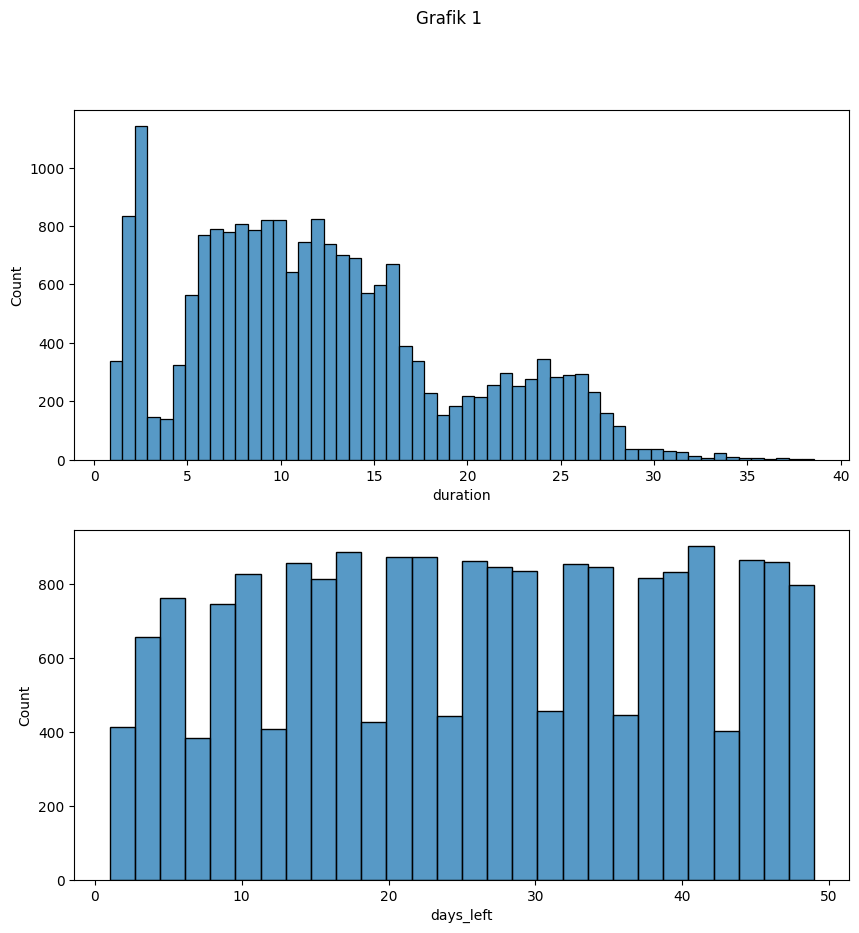

In [140]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
# Umumiy chizma nomini beramiz:
fig.suptitle("Grafik 1")
sns.histplot(ax=ax[0], data=train_df, x='duration')
sns.histplot(ax=ax[1], data=train_df, x='days_left')

#sns.scatterplot(ax=ax[1], data=df, x=df['year'], y=df['price'], hue="fuelType", s=50)
plt.show()

In [144]:
test_df=test_df.drop(columns=['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],axis=1)
test_df.head(5)

,duration,days_left
0,28.25,2
1,13.83,34
2,2.00,30
3,5.17,26
4,16.33,35


# Test qiladigan malumotlarimiz yozuvli ustunlari unique ligini tekshiramiz U Traid data bilan ustma ust ekan

In [65]:
# Matnli ustunlarni songa o'tkazamiz
#for i in ['source_city','departure_time','stops','arrival_time','destination_city','class']:
#   print(test_df[i].unique())

['Kolkata' 'Delhi' 'Mumbai' 'Hyderabad' 'Bangalore' 'Chennai']
['Evening' 'Early_Morning' 'Night' 'Afternoon' 'Morning' 'Late_Night']
['one' 'zero' 'two_or_more']
['Night' 'Early_Morning' 'Late_Night' 'Afternoon' 'Morning' 'Evening']
['Delhi' 'Mumbai' 'Chennai' 'Kolkata' 'Hyderabad' 'Bangalore']
['Business' 'Economy']


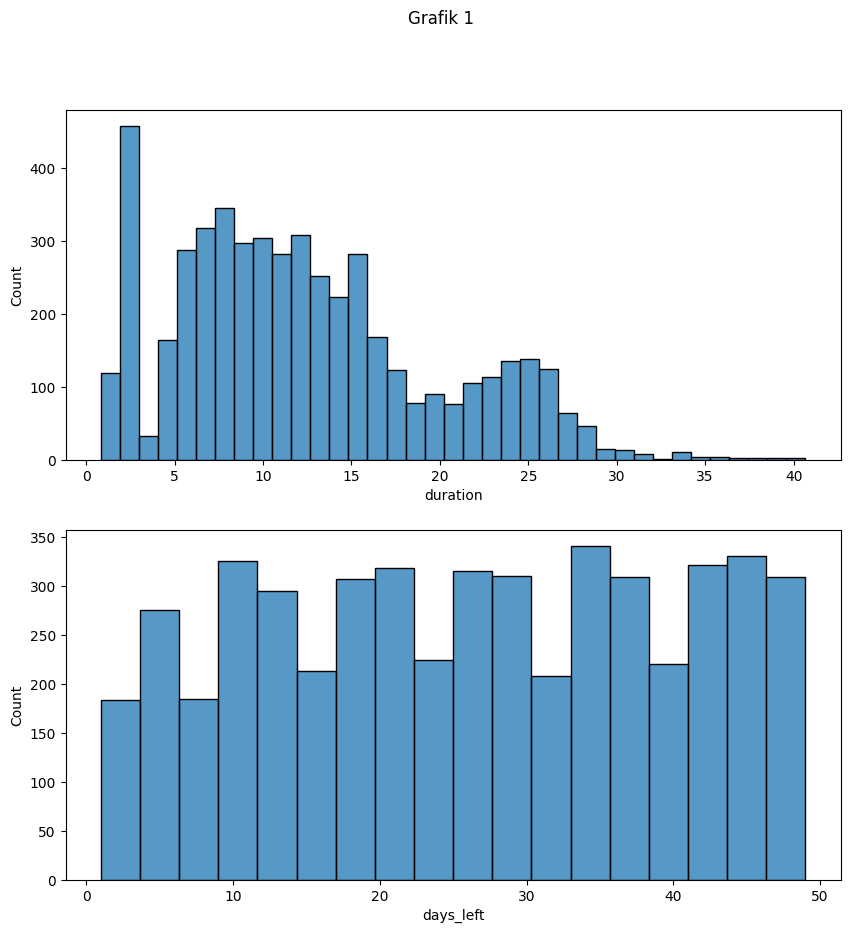

In [145]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
# Umumiy chizma nomini beramiz:
fig.suptitle("Grafik 1")
sns.histplot(ax=ax[0], data=test_df, x='duration')
sns.histplot(ax=ax[1], data=test_df, x='days_left')

#sns.scatterplot(ax=ax[1], data=df, x=df['year'], y=df['price'], hue="fuelType", s=50)
plt.show()

# Yozuvli ustunlarni songa o'giramiz

In [146]:
le = LabelEncoder()

In [70]:
#train_df.columns

In [69]:
#train_df=train_df[['id','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left','price']]
train_df.head(10)

,id,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
5,6,Delhi,Afternoon,one,Morning,Chennai,Business,20.42,5,45257
6,7,Chennai,Evening,one,Morning,Mumbai,Economy,18.42,20,5054
7,8,Bangalore,Morning,zero,Afternoon,Delhi,Business,2.58,30,32923
8,9,Bangalore,Early_Morning,one,Night,Hyderabad,Economy,15.92,12,11383
9,10,Chennai,Night,one,Afternoon,Mumbai,Economy,16.50,18,4357


In [72]:
#train_df.columns

In [71]:

#test_df=test_df[['source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']]
test_df.head(10)

,id,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
5,6,Bangalore,Night,one,Morning,Mumbai,Economy,14.25,40
6,7,Mumbai,Evening,one,Night,Chennai,Economy,5.08,20
7,8,Chennai,Early_Morning,two_or_more,Morning,Kolkata,Economy,26.50,9
8,9,Bangalore,Afternoon,one,Evening,Hyderabad,Economy,4.58,20
9,10,Mumbai,Afternoon,two_or_more,Night,Hyderabad,Economy,10.75,1


# "class" ustuni narxga bog'liqligi yuqori ekan Test datada turli class qiymatlari sonini tekshiramiz

In [22]:
#test_df['class'].value_counts()

class
Economy     3473
Business    1527
Name: count, dtype: int64

# Test qiladigan ma'lumotlardagi yozuvli ustunlarni songa o'giramiz

In [73]:
#for i in ['source_city', 'departure_time', 'stops', 'arrival_time',
#       'destination_city', 'class']:
#    test_df[i]=le.fit_transform(test_df[i].values)

In [147]:
test_df

,duration,days_left
0,28.25,2
1,13.83,34
2,2.00,30
3,5.17,26
4,16.33,35
...,...,...
4995,17.42,15
4996,3.00,40
4997,11.17,37
4998,13.33,38


In [148]:
#for i in ['source_city', 'departure_time', 'stops', 'arrival_time',
#       'destination_city', 'class']:
#    train_df[i]=le.fit_transform(train_df[i].values)


In [151]:
train_df

,duration,days_left,price
0,14.25,21,7212
1,1.75,7,5292
2,9.58,5,60553
3,6.75,28,5760
4,2.00,4,10712
...,...,...,...
19995,7.92,45,3153
19996,5.83,24,3911
19997,35.33,17,14822
19998,16.33,21,6450


In [152]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_df, test_size=0.20, random_state=42)


## *train_df* ni *train_set* va *test_set* ga ajratib oldik. Modelimizni baholash uchun

In [153]:
#train_set=train_set.drop(columns='id',axis=1)
train_set.head()

,duration,days_left,price
5894,4.83,32,6235
3728,17.08,39,51595
8958,8.00,11,7927
7671,15.25,22,53164
5999,30.08,9,44622


In [154]:
x=train_set.drop(columns='price',axis=1)
x.head()

,duration,days_left
5894,4.83,32
3728,17.08,39
8958,8.00,11
7671,15.25,22
5999,30.08,9


In [155]:
y=train_set['price'].copy()
y

5894      6235
3728     51595
8958      7927
7671     53164
5999     44622
         ...  
11284     4453
11964     4000
5390     12150
860       3598
15795    15761
Name: price, Length: 16000, dtype: int64

In [156]:
min_mix_scaler = MinMaxScaler()
x_num=min_mix_scaler.fit_transform(x)


In [157]:
y_num=np.asanyarray(y)

In [158]:
LR_model = linear_model.LinearRegression()
LR_model.fit(x_num, y_num)

LinearRegression()

In [ ]:
#y_predict=

In [159]:
#test_set=test_set.drop(columns=['price','id'],axis=1)
#test_set=test_set.drop(columns='id',axis=1)
x_t=test_set.drop(columns='price',axis=1)
#y_t=test_set['price'].copy()
x_test=min_mix_scaler.fit_transform(x_t)
y_test=test_set['price'].copy()

#test_set.head()

In [103]:


#x_test

# CHiziqli Regressiya modelidan foydalanamiz

In [160]:
y_predict = LR_model.predict(x_test)
y_predict

array([18164.14918862, 26409.85904807, 25743.6548859 , ...,
       30265.08563086, 35615.80227317, 12643.41220041])

In [161]:
MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=19187.362707758646
RMSE=22169.838015043555


# ustunlarni korralatsiyasini tekshiramzi

In [ ]:
#train_df.corrwith(train_df['price']).abs().sort_values(ascending=False)

price               1.000000
class               0.937868
duration            0.213158
stops               0.201309
days_left           0.102545
departure_time      0.058520
arrival_time        0.046801
source_city         0.013570
destination_city    0.008747
dtype: float64

# koralatsiyasi yuqori ustunlarni vizualizatsiya qilamiz

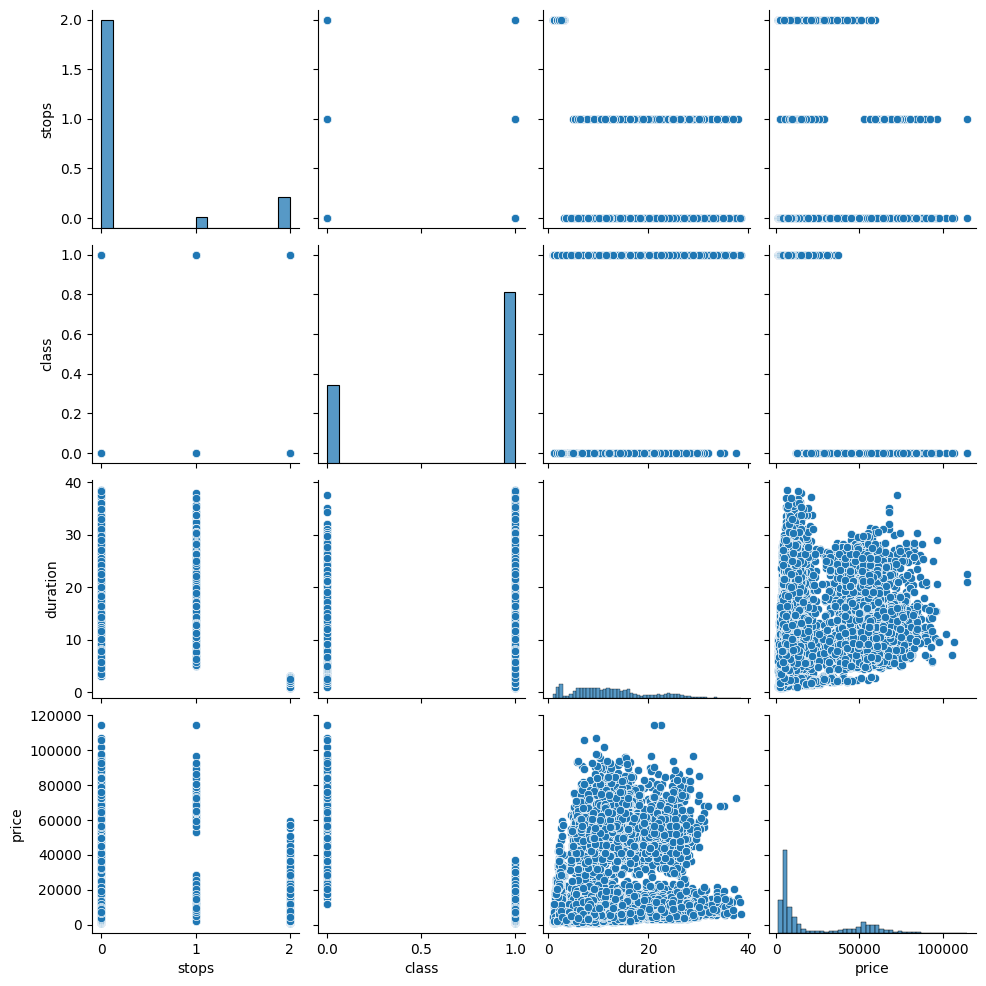

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#sns.pairplot(train_df[['stops','class','duration','price']])
#plt.show()

## Modelimizni o'qitamiz

In [ ]:
#x_train = np.asanyarray(train_df[['class']])
#y_train = np.asanyarray(train_df[['price']])

# Modelni tarbiyalaymiz (train)
#LR_model.fit(x_train, y_train)

LinearRegression()

In [165]:
x_test_df = np.asanyarray(test_df)
#y_test_df = np.asanyarray(test_df[['price']])
#x_test_df
#x_t=test_set.drop(columns='price',axis=1)
#y_t=test_set['price'].copy()
x_test_df=min_mix_scaler.fit_transform(x_test_df)
#y_test=test_set['price'].copy()
x_test_df

array([[0.68825301, 0.02083333],
       [0.32630522, 0.6875    ],
       [0.02936747, 0.60416667],
       ...,
       [0.25953815, 0.75      ],
       [0.31375502, 0.77083333],
       [0.38278112, 1.        ]])

# Test malumotlarimiz bilan shu ma'lumotlar uchun narxlarni bashorat qilamiz

In [166]:
y_predict = LR_model.predict(x_test_df)

In [167]:
y_predict

array([34426.86864038, 20240.85745355, 13579.49427085, ...,
       18101.56403966, 19273.48065573, 19165.38849415])

# Multi linear Reggessio


In [168]:
sample['price'] = y_predict

In [169]:
sample

,id,price
0,1,34426.868640
1,2,20240.857454
2,3,13579.494271
3,4,16198.836661
4,5,21623.136729
...,...,...
4995,4996,25587.634395
4996,4997,12553.158112
4997,4998,18101.564040
4998,4999,19273.480656


In [ ]:
sample.to_csv('prediction_from_alibek.csv', index=False)